In [1]:
# Import required libraries and dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [5]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use for numeric columns to be fit our scaler
df.columns


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# NUMERIC
num_cols = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])


StandardScaler()

In [8]:
# Create a DataFrame with the scaled data

# Copy the crypto names from the original DataFrame

# Set the coin_id column as index

# Display the scaled DataFrame
# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols, index=df.index) # use coin_id as index
df_scaled

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [9]:
# Display the scaled DataFrame
df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Find the Best Value for k Using the Original Scaled DataFrame.

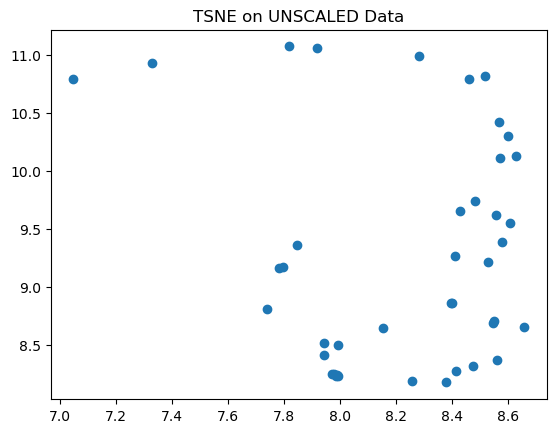

In [10]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df.loc[:, num_cols])) # fit UNSCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on UNSCALED Data")
plt.show()


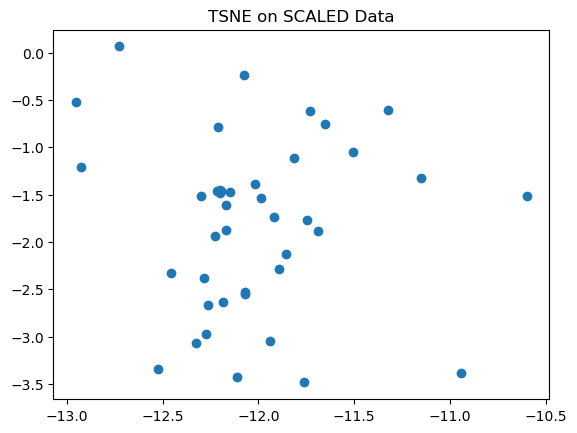

In [11]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on SCALED Data")
plt.show()

Check for Multicollinearity

In [12]:
# Correlations
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


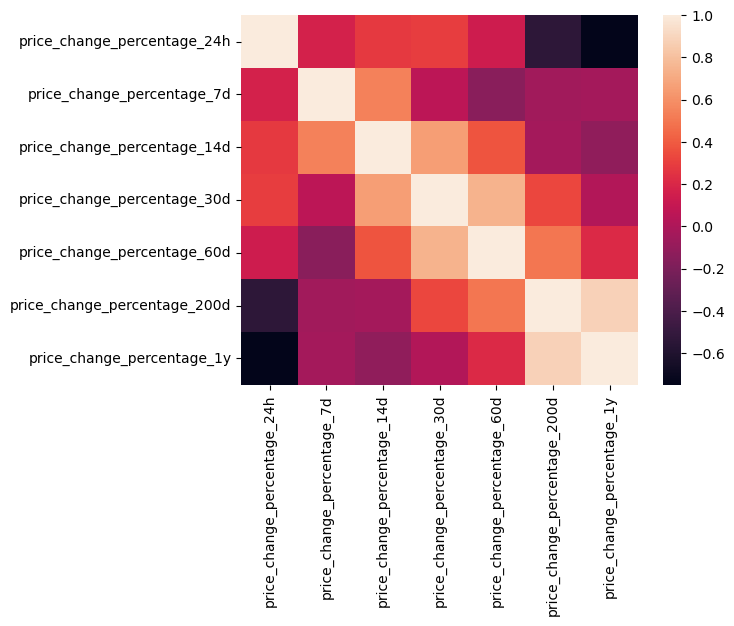

In [13]:
sns.heatmap(corrs)
plt.show()

In [14]:
# Define your "X" - features to predict
X = df_scaled

In [15]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# KMeans 

# Create a list with the number of k-values from 1 to 11
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599
5,7,46.074467,0.258868,29.631263
6,8,43.392694,0.252185,26.466078
7,9,32.913223,0.260185,30.879599


In [16]:
k_elbow_plot = df_metrics.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
k_elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [17]:
# Initialize the K-Means model using the best value for k

# Agglomerative (Hierarchical)

# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)


,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.276114,30.023823
4,6,0.277295,29.858770
5,7,0.276363,30.467052
6,8,0.198534,31.166776
7,9,0.201693,30.667151
8,10,0.199804,31.005396
9,11,0.206917,31.424703


In [18]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = Birch(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.336476,27.695263
4,6,0.185448,29.126884
5,7,0.193982,29.159036
6,8,0.197678,28.717616
7,9,0.194521,27.594528
8,10,0.194966,27.529234
9,11,0.227577,33.233982


In [19]:
# Kmeans of 4 is the best

In [20]:
# Visualize

# Make a copy
k_scaled_df = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
k_scaled_df['clusters'] = preds

k_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [21]:
k_clusters_plot = k_scaled_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols = ["coin_id"],
    title="Cryptocurrencies Clusters",
)
k_clusters_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

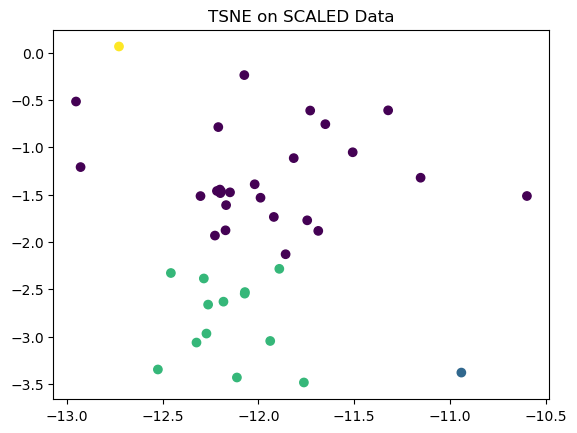

In [22]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first.0

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=k_scaled_df.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

In [23]:
# what those two points that are the same are
k_scaled_df.clusters.value_counts()

clusters
0    26
2    13
3     1
1     1
Name: count, dtype: int64

In [25]:
k_scaled_df.loc[k_scaled_df.clusters.isin([1,3])]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,3
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,1


---

### Optimize Clusters with Principal Component Analysis.

In [26]:
# Create a PCA model instance and set `n_components=3`.
# We have multi-collinearity (we are afflicted)

# Init PCA
n_components = len(df_scaled.columns)
pca = PCA(n_components=n_components)

# Fit the PCA model on the preprocessed DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

df_pca.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,-0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,0.411513,-0.070411


In [27]:
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793, 0.05705673, 0.02729754,
       0.0164632 , 0.00415086])

In [28]:
sum(pca.explained_variance_ratio_[0:3]) # 10 componenets make up 96% of the variance

0.8950316570309842

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89% total variance

---

### Find the Best Value for k Using the Scaled PCA DataFrame

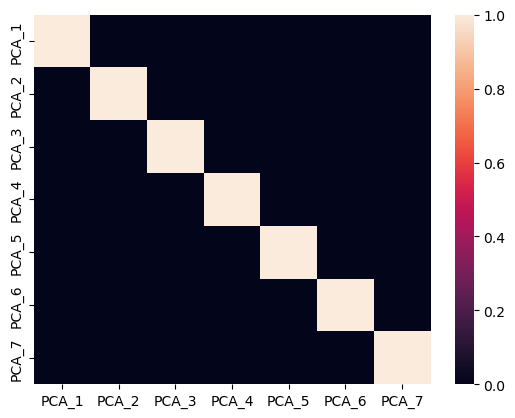

In [29]:
corrs = df_pca.corr()
sns.heatmap(corrs)
plt.show()

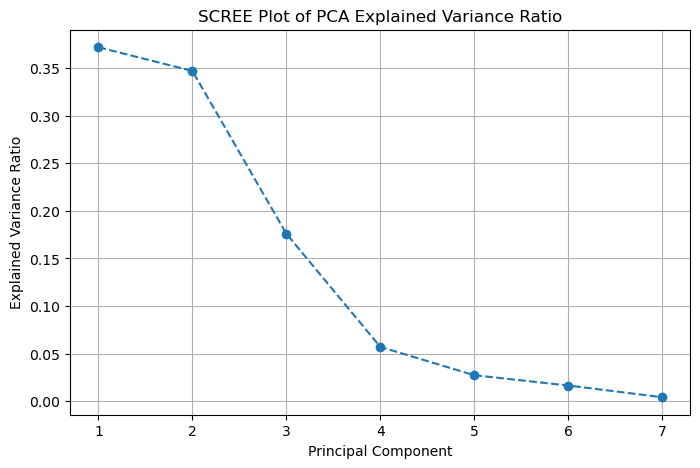

In [30]:
# See if dimensionality reduction will help

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('SCREE Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [31]:
df_pca = df_pca.loc[:, ["PCA_1", "PCA_2", "PCA_3"]]
df_pca.head()

,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


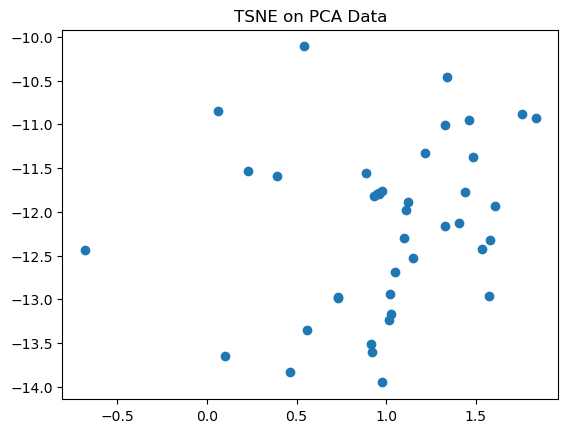

In [32]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca)) # fit PCA data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on PCA Data")
plt.show()

In [33]:
X = df_pca

In [34]:
# KMeans 

# Create a list with the number of k-values from 1 to 11
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
pca_elbow_df = pd.DataFrame(metrics)

# Review the DataFrame
pca_elbow_df.head(10)

,k,inertia,s_score,vrc_scores
0,2,182.339530,0.728406,15.941950
1,3,135.442408,0.356130,17.034560
2,4,49.665497,0.420800,51.455694
3,5,38.672582,0.405662,50.780512
4,6,34.507577,0.334511,45.107936
5,7,23.728365,0.375378,55.678472
6,8,18.574523,0.316385,60.481348
7,9,15.572672,0.323751,61.980734


In [35]:
# Elbow Plot
pca_elbow_plot = pca_elbow_df.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
pca_elbow_plot

:Curve   [k]   (inertia)

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [36]:
# Visualize
pca_clusters = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
pca_clusters['Crypto_Clusters'] = preds

pca_clusters.head()

,PCA_1,PCA_2,PCA_3,Crypto_Clusters
0,-0.600667,0.842760,0.461595,2
1,-0.458261,0.458466,0.952877,2
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,2


In [40]:
pca_clusters_plot = pca_clusters.hvplot.scatter(
    x="PCA_1",
    y="PCA_2",
    by="Crypto_Clusters",
    title = "Cryptocurrencies Clusters Using PCA Data",
    hover_cols=["coin_id"]
)
pca_clusters_plot


:NdOverlay   [Crypto_Clusters]
   :Scatter   [PCA_1]   (PCA_2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [41]:
# Composite plot to contrast the Elbow curves
elbow_composite = k_elbow_plot + pca_elbow_plot
elbow_composite

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [42]:
# Composite plot to contrast the clusters
composite_clusters = k_clusters_plot + pca_clusters_plot
composite_clusters

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Crypto_Clusters]
      :Scatter   [PCA_1]   (PCA_2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The elbow curves are pretty much the same and are similar to the orignal model, the clusters is where you can see the differences